In [1]:
import torch
import matplotlib.pyplot as plt

In [ ]:
def create_frustum(image_size, feature_size, dbound):
    iH, iW = image_size
    fH, fW = feature_size

    ds = (
        torch.arange(*dbound, dtype=torch.float)
        .view(-1, 1, 1)
        .expand(-1, fH, fW) # 118， 32， 88
    )
    D, _, _ = ds.shape

    xs = (
        torch.linspace(0, iW - 1, fW, dtype=torch.float)
        .view(1, 1, fW)
        .expand(D, fH, fW)
    )
    ys = (
        torch.linspace(0, iH - 1, fH, dtype=torch.float)
        .view(1, fH, 1)
        .expand(D, fH, fW)
    )

    frustum = torch.stack((xs, ys, ds), -1)
    return frustum

if __name__ == "__main__":
    image_size = 256, 704  # H , W
    feature_size = 32, 88   # H , W
    dbound = [1.0, 60.0, 0.5]
    create_frustum(image_size, feature_size)

In [1]:
import torch
import matplotlib.pyplot as plt

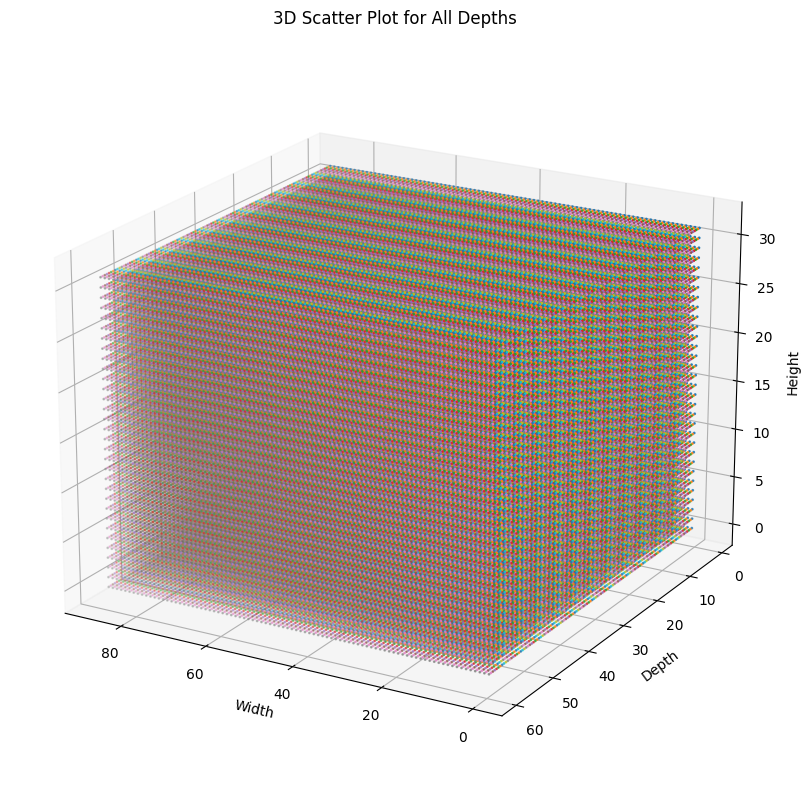

In [4]:
image_size = (256, 704)  # H , W
feature_size = (32, 88)   # H , W
dbound = [1.0, 60.0, 0.5]

iH, iW = image_size
fH, fW = feature_size

ds = (
    torch.arange(*dbound, dtype=torch.float)
    .view(-1, 1, 1)
    .expand(-1, fH, fW)  # 118, 32, 88
)

# 创建一个3D绘图区域
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# 获得X, Y坐标网格
y, x = torch.meshgrid(torch.arange(fH), torch.arange(fW))

# 对每个深度进行循环，并为每个深度上的所有点添加到3D绘图中
for depth in range(ds.shape[0]):
    ax.scatter(x.numpy().flatten(), ds[depth].numpy().flatten(), y.numpy().flatten(), label=f'Depth {ds[depth,0,0].item()}', s=1)

# ax.set_xlim([0, 50])
# ax.set_ylim([0, 70])
# ax.set_zlim([0, 120])

ax.set_xlabel('Width')
ax.set_ylabel('Depth')
ax.set_zlabel('Height')
ax.view_init(elev=20., azim=120)  # 设置观察角度
plt.title('3D Scatter Plot for All Depths')
plt.show()


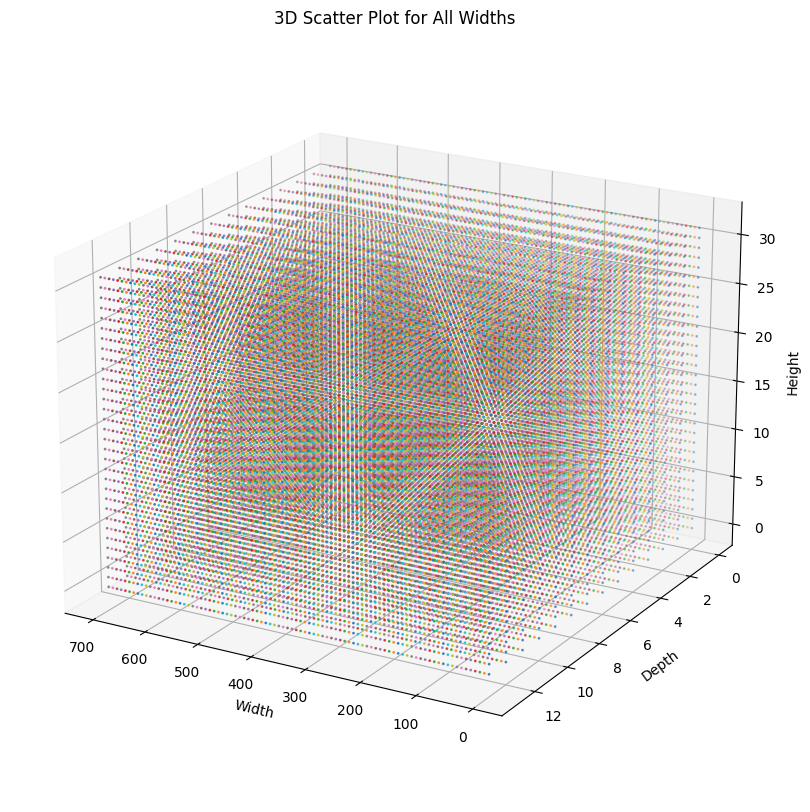

In [4]:
image_size = (256, 704)  # H , W
feature_size = (32, 88)  # H , W
dbound = [1.0, 60.0, 4]

iH, iW = image_size
fH, fW = feature_size

D = int((dbound[1] - dbound[0]) / dbound[2])

xs = (
    torch.linspace(0, iW - 1, fW, dtype=torch.float)
    .view(1, 1, fW)
    .expand(D, fH, fW)
)

# 创建一个3D绘图区域
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# 获得Y, Z坐标网格
y, z = torch.meshgrid(torch.arange(fH), torch.arange(D))

# 对每个宽度进行循环，并为每个宽度上的所有点添加到3D绘图中
for width in range(xs.shape[2]):
    ax.scatter(xs[:,:,width].numpy().flatten(), z.numpy().flatten(), y.numpy().flatten(), label=f'Width {xs[0,0,width].item()}', s=1)

ax.set_xlabel('Width')
ax.set_ylabel('Depth')
ax.set_zlabel('Height')
ax.view_init(elev=20., azim=120)  # 设置观察角度
plt.title('3D Scatter Plot for All Widths')
plt.show()


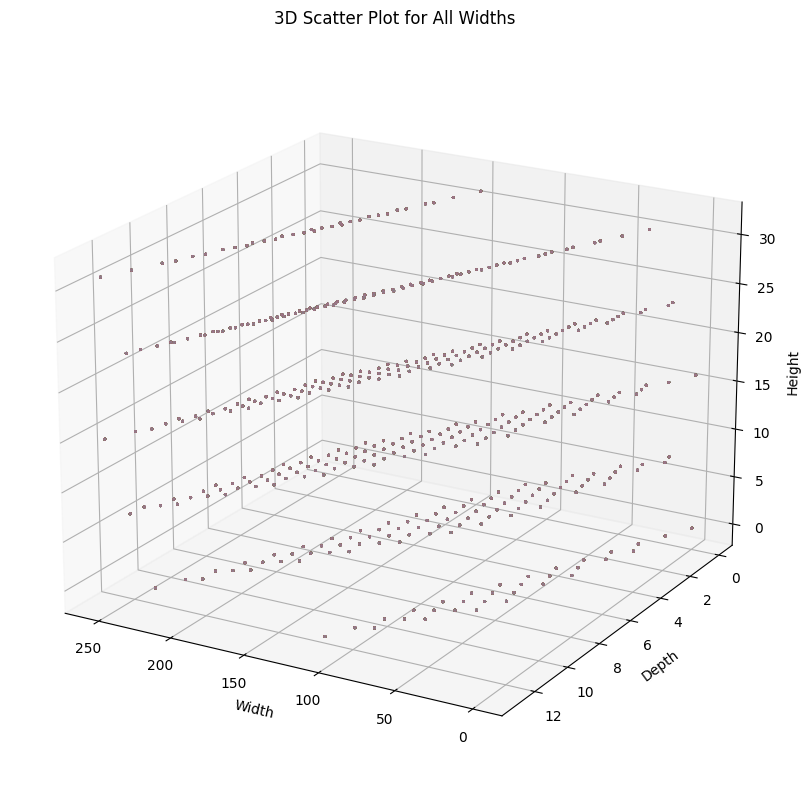

In [5]:
image_size = (256, 704)  # H , W
feature_size = (32, 88)  # H , W
dbound = [1.0, 60.0, 4]

iH, iW = image_size
fH, fW = feature_size

D = int((dbound[1] - dbound[0]) / dbound[2])

ys = (
    torch.linspace(0, iH - 1, fH, dtype=torch.float) # iH 256  fH 32 从0-255 采样32个点
    .view(1, fH, 1)
    .expand(D, fH, fW) # 【118， 32， 88】
)

# 创建一个3D绘图区域
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# 获得Y, Z坐标网格
y, z = torch.meshgrid(torch.arange(fH), torch.arange(D))

# 对每个宽度进行循环，并为每个宽度上的所有点添加到3D绘图中
for width in range(ys.shape[2]):
    ax.scatter(ys[:,:,width].numpy().flatten(), z.numpy().flatten(), y.numpy().flatten(), label=f'Width {ys[0,0,width].item()}', s=1)

ax.set_xlabel('Width')
ax.set_ylabel('Depth')
ax.set_zlabel('Height')
ax.view_init(elev=20., azim=120)  # 设置观察角度
plt.title('3D Scatter Plot for All Widths')
plt.show()


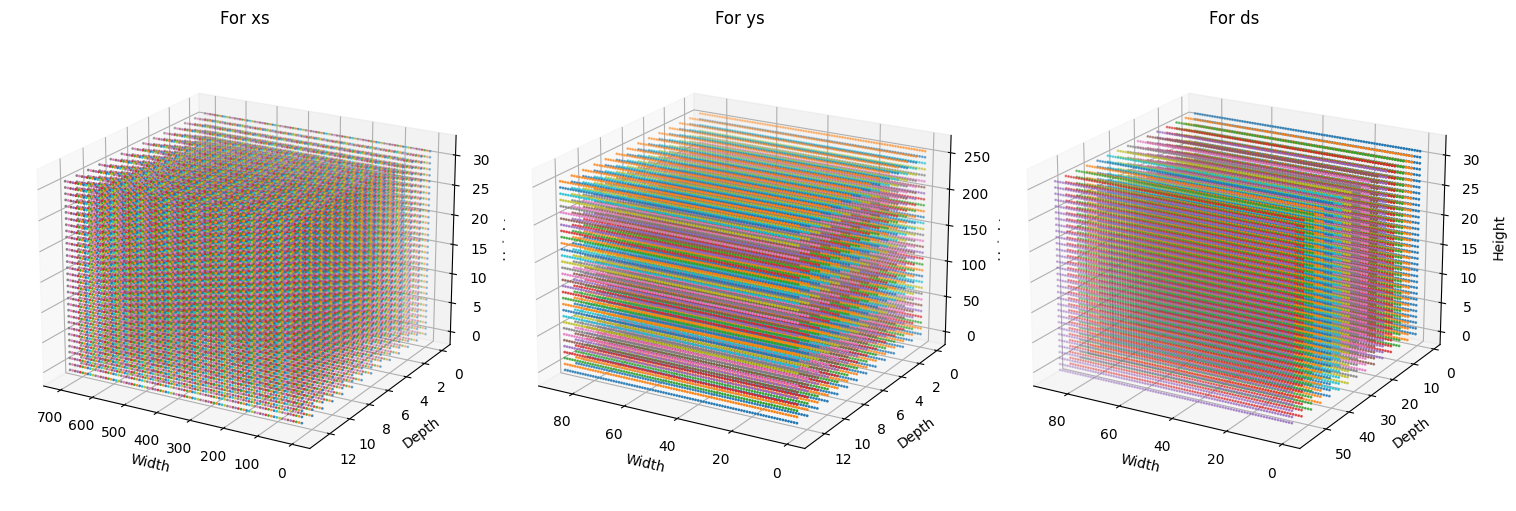

In [7]:
image_size = (256, 704)  # H , W
feature_size = (32, 88)  # H , W
dbound = [1.0, 60.0, 4]

iH, iW = image_size
fH, fW = feature_size

D = int((dbound[1] - dbound[0]) / dbound[2])

# For ys:
ys = (
    torch.linspace(0, iH - 1, fH, dtype=torch.float) # iH 256  fH 32 从0-255 采样32个点
    .view(1, fH, 1)
    .expand(D, fH, fW) # 【118， 32， 88】
)

# For xs:
xs = (
    torch.linspace(0, iW - 1, fW, dtype=torch.float) # iW 704  fW 88 从0-703 采样88个点
    .view(1, 1, fW) 
    .expand(D, fH, fW) # 【118， 32， 88】
)

# For ds:
ds = (
    torch.arange(*dbound, dtype=torch.float)
    .view(-1, 1, 1)
    .expand(-1, fH, fW) # 118， 32， 88
)

# ... [前面的代码保持不变]

# Plotting:
fig = plt.figure(figsize=(15, 5))

# Plot for xs:
ax1 = fig.add_subplot(131, projection='3d')
y, z = torch.meshgrid(torch.arange(fH), torch.arange(D))
for width in range(xs.shape[2]):
    ax1.scatter(xs[:,:,width].numpy().flatten(), z.numpy().flatten(), y.numpy().flatten(), s=1)
ax1.set_title('For xs')
ax1.set_xlabel('Width')
ax1.set_ylabel('Depth')
ax1.set_zlabel('Height')
ax1.view_init(elev=20., azim=120)

# Plot for ys:
ax2 = fig.add_subplot(132, projection='3d')
x, z = torch.meshgrid(torch.arange(fW), torch.arange(D)) # 注意这里改为x, z
for height in range(ys.shape[1]):
    ax2.scatter(x.numpy().flatten(), z.numpy().flatten(), ys[:,height,:].numpy().flatten(), s=1)
ax2.set_title('For ys')
ax2.set_xlabel('Width')
ax2.set_ylabel('Depth')
ax2.set_zlabel('Height')
ax2.view_init(elev=20., azim=120)

# Plot for ds:
ax3 = fig.add_subplot(133, projection='3d')
x, y = torch.meshgrid(torch.arange(fW), torch.arange(fH))
for depth in range(ds.shape[0]):
    ax3.scatter(x.numpy().flatten(), ds[depth,:,:].numpy().flatten(), y.numpy().flatten(), s=1)
ax3.set_title('For ds')
ax3.set_xlabel('Width')
ax3.set_ylabel('Depth')
ax3.set_zlabel('Height')
ax3.view_init(elev=20., azim=120)

plt.tight_layout()
plt.show()

In [ ]:
import torch

In [13]:
a = torch.ones((1, 3, 1))
# a[0, 1] = torch.tensor([1, 2])
print(a[0, 1])
# a = a.expand(2, 3, 4)
# a

tensor([1.])


tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [14]:
a = torch.arange(54).resize(1, 6, 3, 3)
a.shape

/usr/local/lib/python3.8/dist-packages/torch/_tensor.py:493: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


torch.Size([1, 6, 3, 3])

In [ ]:
a = torch.arange(54).reshape(1, 6, 3, 3)
a.shape